In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats.mstats import winsorize

In [3]:
data = pd.read_csv('microcalcification.csv')

In [4]:
data

,Area,Grey Level,Gradient Strength,Noise Fluctuation,Contrast,Shape Descriptor,Microcalcification
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'
...,...,...,...,...,...,...,...
11178,-0.250012,-0.377300,-0.321142,1.269157,3.652984,1.092791,'1'
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.345700,'1'
11180,1.204988,1.763724,-0.501468,1.562408,6.489072,0.931294,'1'
11181,0.736644,-0.222474,-0.050653,1.509665,0.539269,1.315229,'1'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                11183 non-null  float64
 1   Grey Level          11183 non-null  float64
 2   Gradient Strength   11183 non-null  float64
 3   Noise Fluctuation   11183 non-null  float64
 4   Contrast            11183 non-null  float64
 5   Shape Descriptor    11183 non-null  float64
 6   Microcalcification  11183 non-null  object 
dtypes: float64(6), object(1)
memory usage: 611.7+ KB


In [6]:
data.head()

,Area,Grey Level,Gradient Strength,Noise Fluctuation,Contrast,Shape Descriptor,Microcalcification
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


In [7]:
data.tail()

,Area,Grey Level,Gradient Strength,Noise Fluctuation,Contrast,Shape Descriptor,Microcalcification
11178,-0.250012,-0.377300,-0.321142,1.269157,3.652984,1.092791,'1'
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.345700,'1'
11180,1.204988,1.763724,-0.501468,1.562408,6.489072,0.931294,'1'
11181,0.736644,-0.222474,-0.050653,1.509665,0.539269,1.315229,'1'
11182,0.177003,-0.191508,-0.501468,1.578864,7.750705,1.555951,'1'


In [8]:
data.describe()

,Area,Grey Level,Gradient Strength,Noise Fluctuation,Contrast,Shape Descriptor
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096536e-10,1.297595e-09,5.698113e-10,-2.435706e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


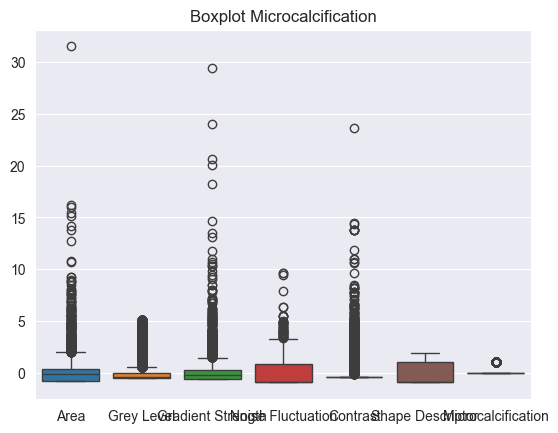

In [9]:
# Convert the 'Microcalcification' feature to numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Microcalcification'] = le.fit_transform(data['Microcalcification'])
sns.boxplot(data=data)
plt.title("Boxplot Microcalcification")
plt.show()

In [10]:
def winsorize(df, exclude_columns=[], lower_percentile=0.05, upper_percentile=0.85):
    df_winsorized = df.copy()
    for column_name in df.columns:
        if column_name not in exclude_columns:
            x = df[column_name]
            lower_bound = x.quantile(lower_percentile)
            upper_bound = x.quantile(upper_percentile)
            winsorized_values = np.clip(x, lower_bound, upper_bound)
            df_winsorized[column_name] = winsorized_values
    return df_winsorized

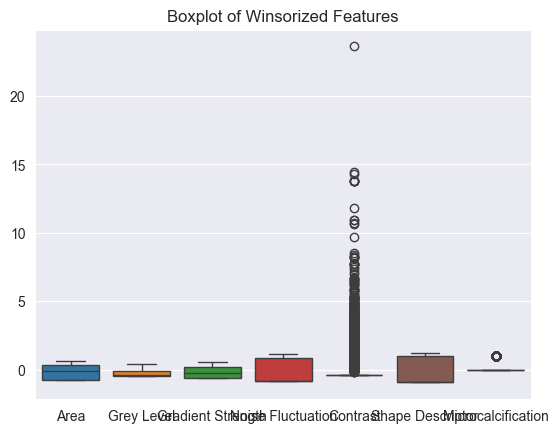

In [11]:
# Exclude "Contrast" and "Microcalcification" columns
exclude_columns = ["Contrast", "Microcalcification"]

# Apply winsorize to all columns except those in exclude_columns
data = winsorize(data, exclude_columns=exclude_columns)

# Visualize winsorized data using boxplot
sns.boxplot(data=data)
plt.title("Boxplot of Winsorized Features")
plt.show()

In [12]:
data.head()

,Area,Grey Level,Gradient Strength,Noise Fluctuation,Contrast,Shape Descriptor,Microcalcification
0,0.230020,0.379136,-0.276061,0.832444,-0.377866,0.480322,0
1,0.155491,-0.169390,0.535408,-0.859553,-0.377866,-0.945723,0
2,-0.784415,-0.443654,0.535408,-0.859553,-0.377866,-0.945723,0
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,0
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,0


In [13]:
data.isnull().sum()

Area                  0
Grey Level            0
Gradient Strength     0
Noise Fluctuation     0
Contrast              0
Shape Descriptor      0
Microcalcification    0
dtype: int64

In [14]:
data.tail()

,Area,Grey Level,Gradient Strength,Noise Fluctuation,Contrast,Shape Descriptor,Microcalcification
11178,-0.250012,-0.377300,-0.321142,1.111771,3.652984,1.092791,1
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.174148,1
11180,0.602950,0.379136,-0.501468,1.111771,6.489072,0.931294,1
11181,0.602950,-0.222474,-0.050653,1.111771,0.539269,1.174148,1
11182,0.177003,-0.191508,-0.501468,1.111771,7.750705,1.174148,1


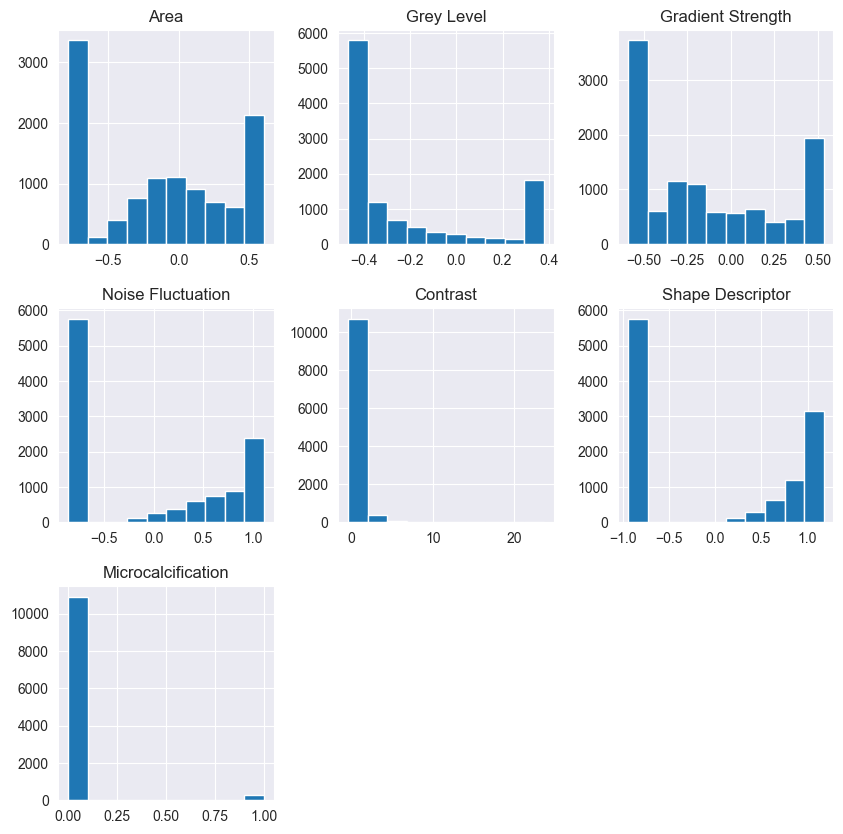

In [15]:
data.hist(figsize=(10, 10))
plt.show()

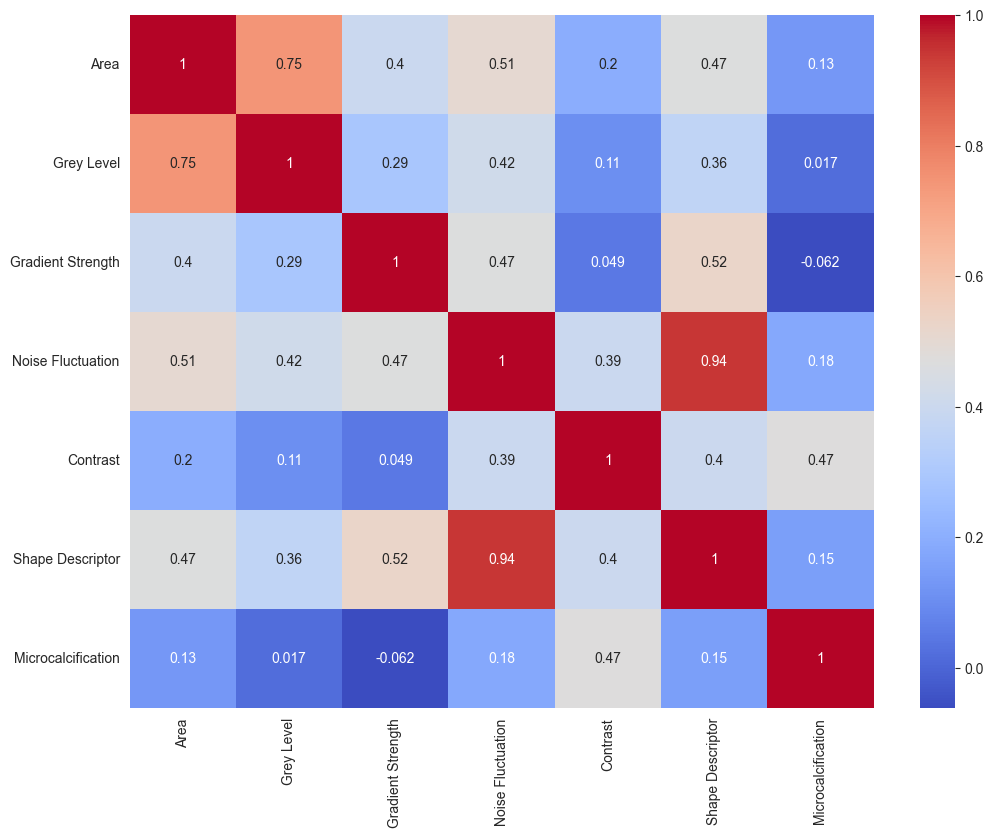

In [16]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
data = data.drop('Gradient Strength', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                11183 non-null  float64
 1   Grey Level          11183 non-null  float64
 2   Noise Fluctuation   11183 non-null  float64
 3   Contrast            11183 non-null  float64
 4   Shape Descriptor    11183 non-null  float64
 5   Microcalcification  11183 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 480.6 KB


In [18]:
X = data.drop('Microcalcification', axis=1)
y = data['Microcalcification']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# Define your models dictionary
models = {
    "Logistic Regression": LogisticRegression(), 
    "SVC": SVC(random_state=45), 
    "Decision Tree Classifier": DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=5, random_state=45), 
    "KNeighbors Classifier": KNeighborsClassifier(), 
    "Gaussian Naive Bayes": GaussianNB()
}


In [21]:
results_data = []

# Perform k-fold cross-validation for each model
# Perform k-fold cross-validation for each model
for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_results = []
    fold_recall = []
    fold_support = []
    fold_f1_score = []
    for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train), 1):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)
        fold_acc = accuracy_score(y_val_fold, y_pred_fold)
        fold_results.append(fold_acc)
        
        report = classification_report(y_val_fold, y_pred_fold, output_dict=True)
        fold_recall.append(report['macro avg']['recall'])
        fold_support.append(report['macro avg']['support'])
        fold_f1_score.append(report['macro avg']['f1-score'])
        
    mean_accuracy = np.mean(fold_results)
    std_deviation = np.std(fold_results)
    mean_recall = np.mean(fold_recall)
    mean_support = np.mean(fold_support)
    mean_f1_score = np.mean(fold_f1_score)
    
    # Append results to list
    results_data.append({"Model": name, "Mean Accuracy": mean_accuracy, "Mean Recall": mean_recall, 
                         "Mean Support": mean_support, "Mean F1 Score": mean_f1_score,
                         **{f"Fold {i}": acc for i, acc in enumerate(fold_results, 1)}})

# Create DataFrame from list
results_df = pd.DataFrame(results_data)

# Display the DataFrame
results_df

,Model,Mean Accuracy,Mean Recall,Mean Support,Mean F1 Score,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
0,Logistic Regression,0.982451,0.666853,1789.2,0.728848,0.978212,0.982672,0.983231,0.984908,0.983231
1,SVC,0.983009,0.672582,1789.2,0.735522,0.981006,0.983231,0.983790,0.984349,0.982672
2,Decision Tree Classifier,0.980774,0.642050,1789.2,0.689044,0.977654,0.980995,0.981554,0.982113,0.981554
3,KNeighbors Classifier,0.982786,0.714826,1789.2,0.763792,0.977654,0.981554,0.983790,0.986585,0.984349
4,Gaussian Naive Bayes,0.955623,0.790611,1789.2,0.686852,0.952514,0.955282,0.957518,0.965903,0.946898


In [22]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier

# Convert the dictionary items to a list of tuples
estimators = list(models.items())
# Define ensemble methods
ensemble_methods = {
    "Voting": VotingClassifier(estimators=estimators, voting='hard'),
    "Ada Boost": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5)),
    "Stacking": StackingClassifier(estimators=estimators),
    "Bagging": BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))
}

results_data = []

# Perform k-fold cross-validation for each ensemble method
for name, model in ensemble_methods.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []  # List to store fold accuracies
    for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train), 1):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)
        fold_acc = accuracy_score(y_val_fold, y_pred_fold)
        fold_accuracies.append(fold_acc)
    mean_accuracy = np.mean(fold_accuracies)
    std_deviation = np.std(fold_accuracies)
    
    # Append results to the list
    results_data.append({"Ensemble Method": name, "Mean Accuracy": mean_accuracy, "Std Deviation": std_deviation, 
                         **{f"Fold {i}": acc for i, acc in enumerate(fold_accuracies, 1)}})

# Create DataFrame from list
results_df = pd.DataFrame(results_data)

# Display the DataFrame
results_df


C:\Users\rachm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\rachm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\rachm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\rachm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\rachm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: Futu

,Ensemble Method,Mean Accuracy,Std Deviation,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
0,Voting,0.982786,0.001777,0.979330,0.983231,0.983790,0.984349,0.983231
1,Ada Boost,0.983233,0.001903,0.982123,0.980436,0.986026,0.983231,0.984349
2,Stacking,0.982451,0.002221,0.978771,0.982113,0.983790,0.985467,0.982113
3,Bagging,0.983233,0.000999,0.982682,0.981554,0.983790,0.984349,0.983790
